# Prédiction du succès d’une campagne de Marketing d’une banque

# Analyse macro du jeu de données

In [273]:
# Import des bibliothèques nécessaires

from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Lecture du fichier
df = pd.read_csv('bank.csv', sep = ',')

# Affichage
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [274]:
df.isnull().sum(axis=0) # Compte les valeurs manquantes pour chaque COLONNE

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [275]:
# Taille du jeu de données et détection des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [276]:
# Description des variables catégorielles
df.describe(include= ["object"]).transpose()

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


In [277]:
# Description des variables numériques
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


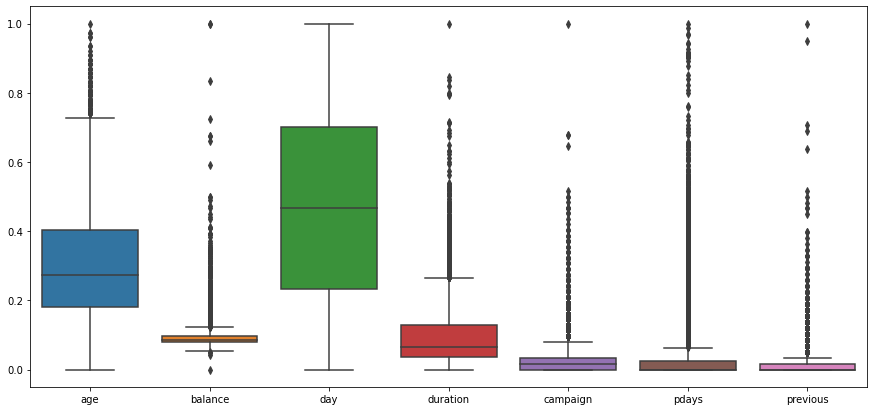

In [278]:
# Analyse des variables numériques

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

plt.figure(figsize=(15,7))
df_scaler = df[["age", "balance","day","duration","campaign","pdays","previous"]]

z = scaler.fit_transform(df_scaler)
z = pd.DataFrame(z, columns=df_scaler.columns)

sns.boxplot(data=z);

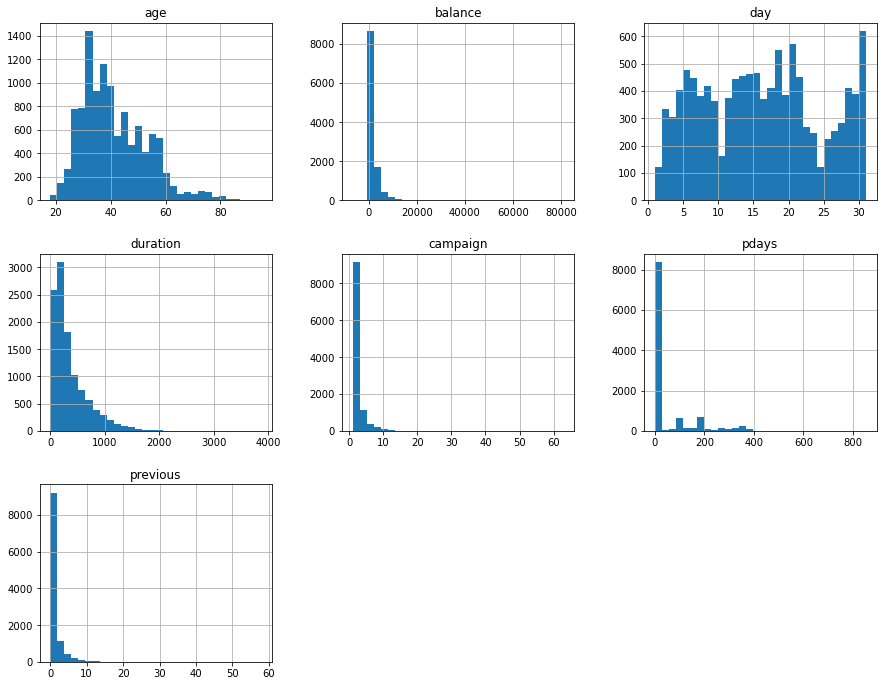

In [279]:
# Analyse des variables numériques
df[df.columns].hist(bins=30, figsize=(15, 16), layout=(4, 3));

# Observations des variables

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: job, dtype: float64


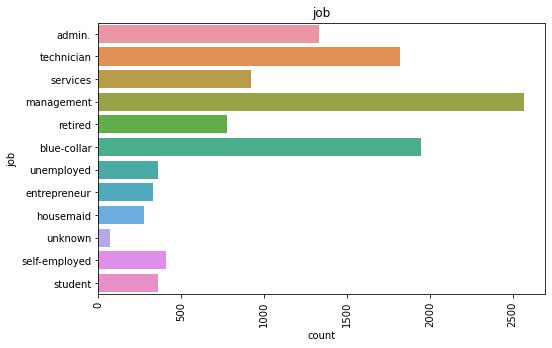

In [280]:
# Observations job

plt.figure(figsize=(8,5))
plt.title(label="job")
sns.countplot(y=df['job']);
plt.xticks(rotation=90); 
print(df['job'].describe())
print(df['job'].value_counts(normalize=True))

### Remarque : "unknow" est considéré comme une valeur manquante > 0.6%

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count       11162
unique          3
top       married
freq         6351
Name: marital, dtype: object
married     0.568984
single      0.315176
divorced    0.115839
Name: marital, dtype: float64


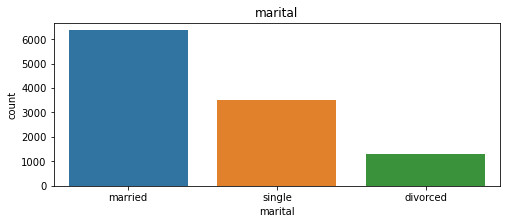

In [281]:
# Observations marital

plt.figure(figsize=(8,3))
plt.title(label="marital")
sns.countplot(df['marital']);

print(df['marital'].describe())
print(df['marital'].value_counts(normalize=True))

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count         11162
unique            4
top       secondary
freq           5476
Name: education, dtype: object
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: education, dtype: float64


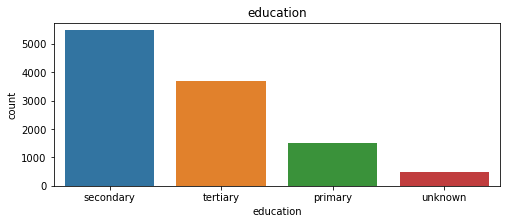

In [282]:
# Observations education

plt.figure(figsize=(8,3))
plt.title(label="education")
sns.countplot(df['education']);

print(df['education'].describe())
print(df['education'].value_counts(normalize=True))

count     11162
unique        2
top          no
freq      10994
Name: default, dtype: object
no     0.984949
yes    0.015051
Name: default, dtype: float64


C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


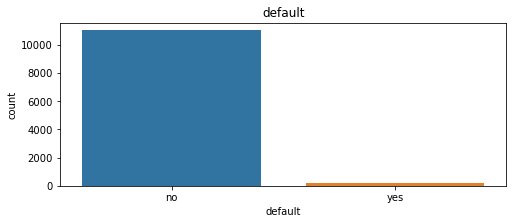

In [283]:
# Observations default

plt.figure(figsize=(8,3))
plt.title(label="default")
sns.countplot(df['default']);

print(df['default'].describe())
print(df['default'].value_counts(normalize=True))

count     11162
unique        2
top          no
freq       5881
Name: housing, dtype: object
no     0.526877
yes    0.473123
Name: housing, dtype: float64


C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


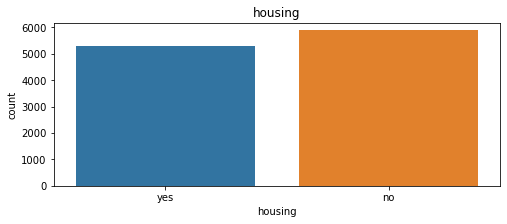

In [284]:
# Observations housing

plt.figure(figsize=(8,3))
plt.title(label="housing")
sns.countplot(df['housing']);

print(df['housing'].describe())
print(df['housing'].value_counts(normalize=True))

count     11162
unique        2
top          no
freq       9702
Name: loan, dtype: object
no     0.869199
yes    0.130801
Name: loan, dtype: float64


C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


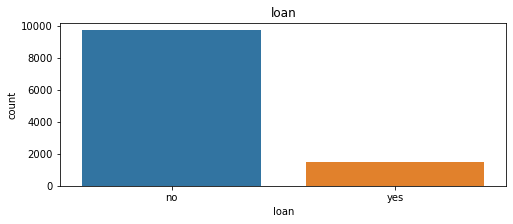

In [285]:
# Observations loan

plt.figure(figsize=(8,3))
plt.title(label="loan")
sns.countplot(df['loan']);

print(df['loan'].describe())
print(df['loan'].value_counts(normalize=True))

count        11162
unique           3
top       cellular
freq          8042
Name: contact, dtype: object
cellular     0.720480
unknown      0.210177
telephone    0.069342
Name: contact, dtype: float64


C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


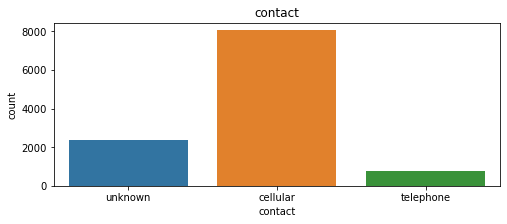

In [286]:
# Observations contact

plt.figure(figsize=(8,3))
plt.title(label="contact")
sns.countplot(df['contact']);

print(df['contact'].describe())
print(df['contact'].value_counts(normalize=True))

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     11162
unique       12
top         may
freq       2824
Name: month, dtype: object
may    0.253001
aug    0.136087
jul    0.135639
jun    0.109479
nov    0.084483
apr    0.082691
feb    0.069522
oct    0.035119
jan    0.030819
sep    0.028579
mar    0.024727
dec    0.009855
Name: month, dtype: float64


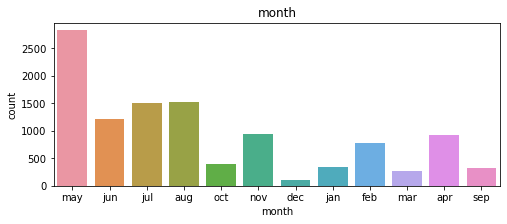

In [287]:
# Observations month

plt.figure(figsize=(8,3))
plt.title(label="month")
sns.countplot(df['month']);

print(df['month'].describe())
print(df['month'].value_counts(normalize=True))

count       11162
unique          4
top       unknown
freq         8326
Name: poutcome, dtype: object
unknown    0.745924
failure    0.110016
success    0.095951
other      0.048110
Name: poutcome, dtype: float64


C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


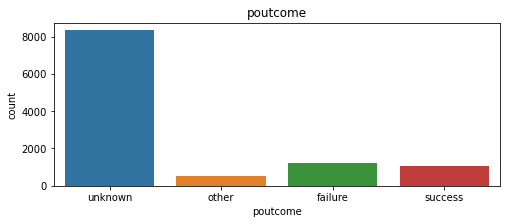

In [288]:
# Observations poutcome

plt.figure(figsize=(8,3))
plt.title(label="poutcome")
sns.countplot(df['poutcome']);

print(df['poutcome'].describe())
print(df['poutcome'].value_counts(normalize=True))

count     11162
unique        2
top          no
freq       5873
Name: deposit, dtype: object
no     0.52616
yes    0.47384
Name: deposit, dtype: float64

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


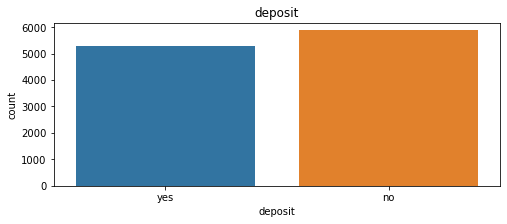

In [289]:
# Observations deposit

plt.figure(figsize=(8,3))
plt.title(label="deposit")
sns.countplot(df['deposit']);

print(df['deposit'].describe())
print(df['deposit'].value_counts(normalize=True))

# Comparaison des profils deposit=0 vs deposit=1

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\li

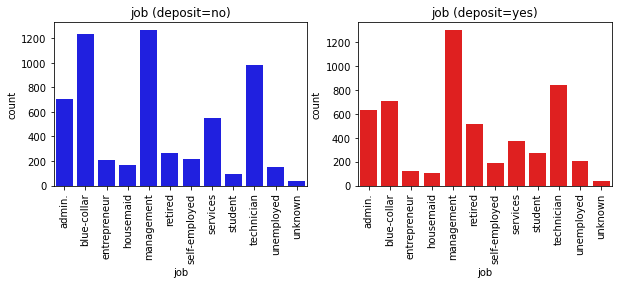

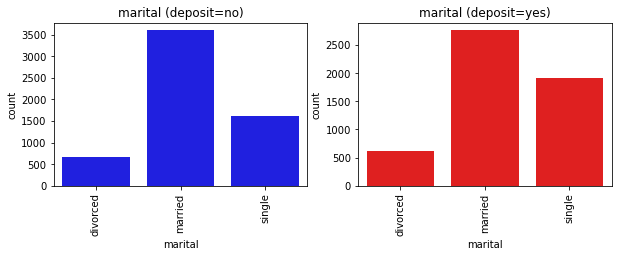

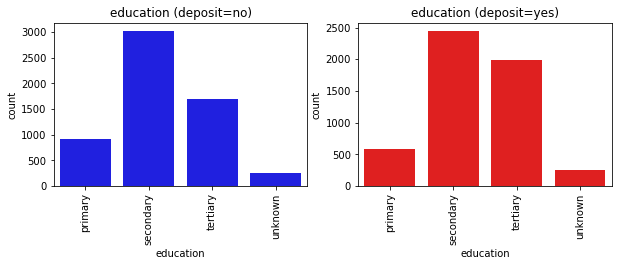

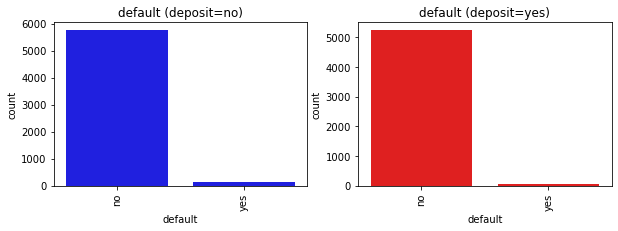

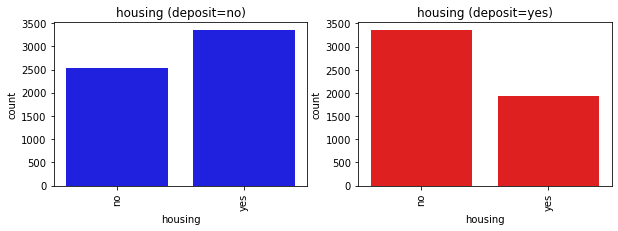

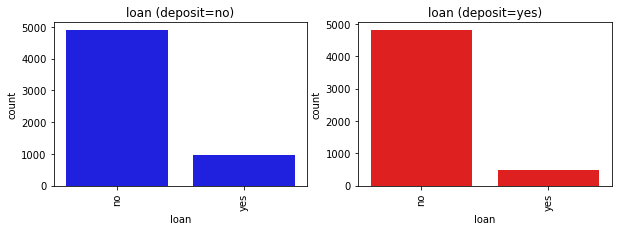

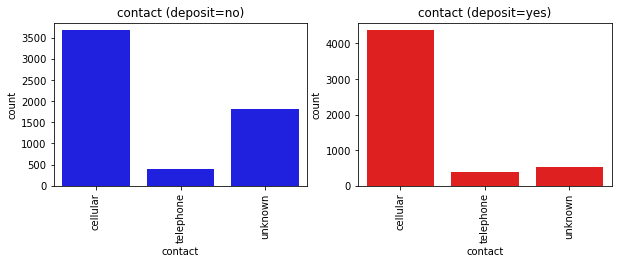

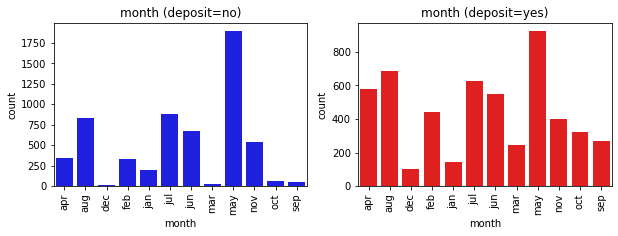

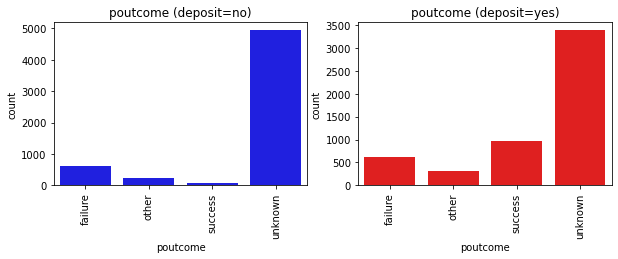

In [290]:
# Comparaison des profils deposit=no vs les deposit=yes - Variables catégorielles

cols = ["job", "marital","education","default","housing","loan","contact","month","poutcome"]
for col in cols:  
    df.sort_values(by=[col], inplace=True)
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1) 
    plt.title(label=f"{col} (deposit=no)")
    sns.countplot(df[col][df['deposit'] == 'no'], color='b');
    plt.xticks(rotation=90)

    plt.subplot(1,2,2) 
    plt.title(label=f"{col} (deposit=yes)")
    sns.countplot(df[col][df['deposit'] == 'yes'], color='r');
    plt.xticks(rotation=90)
### Commentaire :

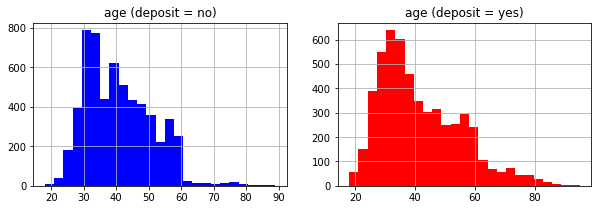

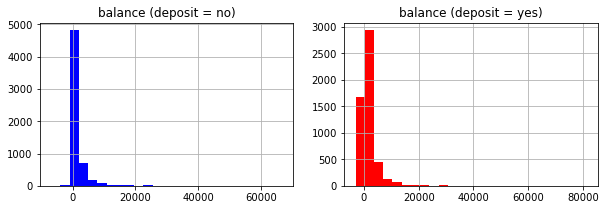

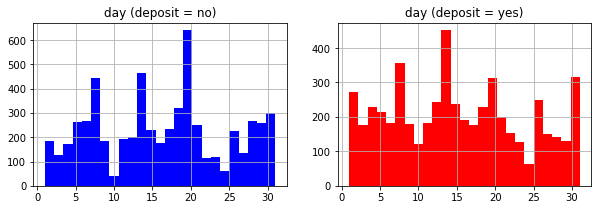

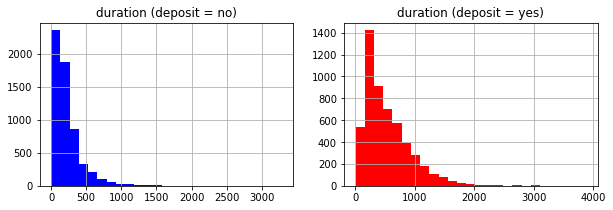

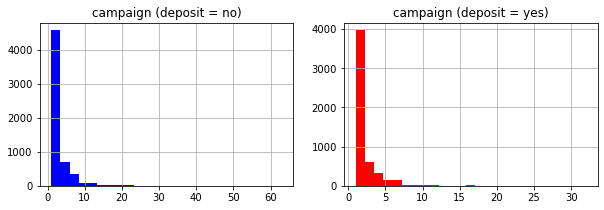

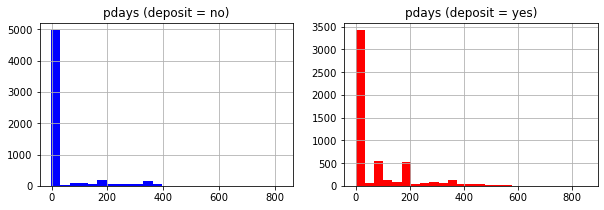

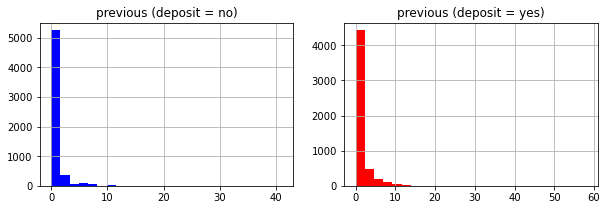

In [291]:
# Comparaison des profils deposit=no vs les deposit=yes - Variables numériques

cols = ["age", "balance","day","duration","campaign","pdays","previous"]
for col in cols:    
    df.sort_values(by=[col], inplace=True)
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1) 
    plt.title(label=f"{col} (deposit = no)")
    df[col][df['deposit'] == 'no'].hist(bins = 25, color='b')

    plt.subplot(1,2,2) 
    plt.title(label=f"{col} (deposit = yes)")
    df[col][df['deposit'] == 'yes'].hist(bins = 25, color='r')

# Préprocessing

In [292]:
# Traitement des variables catégorielles
df.describe(include= ["object"]).transpose()

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


In [293]:
# Dichotomisation

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ["job","marital","education","contact","month"]
for col in cols:
    df[col]= le.fit_transform(df[col])

In [294]:
# Remplace yes/no par 1/0

cols = ["default", "housing","loan","deposit"]
for col in cols:    
    df[col] = df[col].replace(('yes', 'no'), (1, 0))

In [295]:
# Regroupe en 2 catégories

df["poutcome"] = df["poutcome"].apply(lambda x: "success" in x)
df["poutcome"] = df["poutcome"].replace((True, False), (1, 0))

In [296]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8363,36,1,1,0,0,871,1,1,1,18,9,2,1,-1,0,0,0
4339,24,6,2,2,0,2984,1,0,2,27,8,935,1,-1,0,0,1
7180,34,0,0,1,0,67,1,0,2,6,8,90,1,-1,0,0,0
923,37,7,1,1,0,1970,1,0,1,5,9,253,1,-1,0,0,1
4853,37,9,2,1,0,4,0,0,0,11,1,933,1,-1,0,0,1


# Corrélations entre variables

In [297]:
df.corr()["deposit"]

age          0.034901
job          0.063395
marital      0.067610
education    0.095948
default     -0.040680
balance      0.081129
housing     -0.203888
loan        -0.110580
contact     -0.249847
day         -0.056326
month       -0.037121
duration     0.451919
campaign    -0.128081
pdays        0.151593
previous     0.139867
poutcome     0.286642
deposit      1.000000
Name: deposit, dtype: float64

<AxesSubplot:>

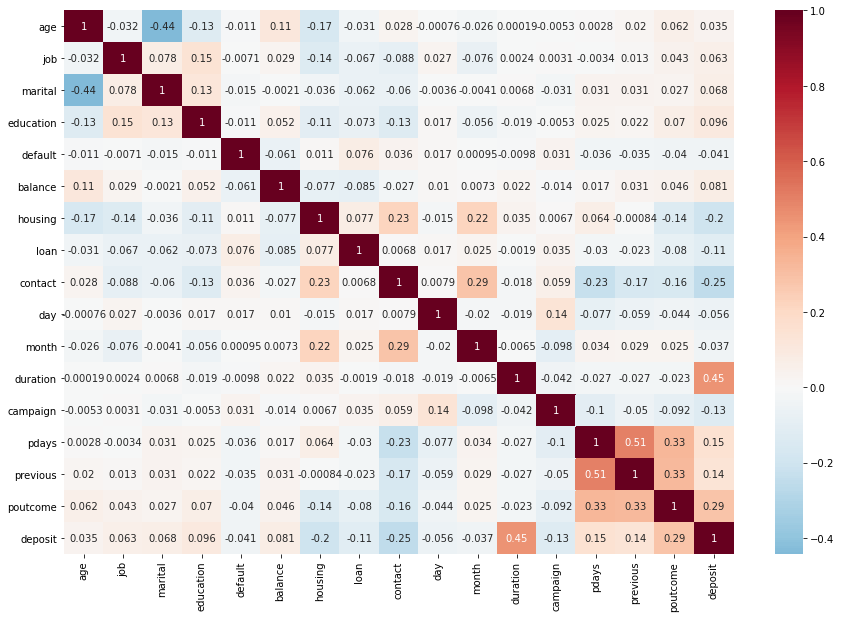

In [298]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', center=0)

# Corrélation avec la target

<AxesSubplot:title={'center':'Correlation des features avec la variable cible deposit'}>

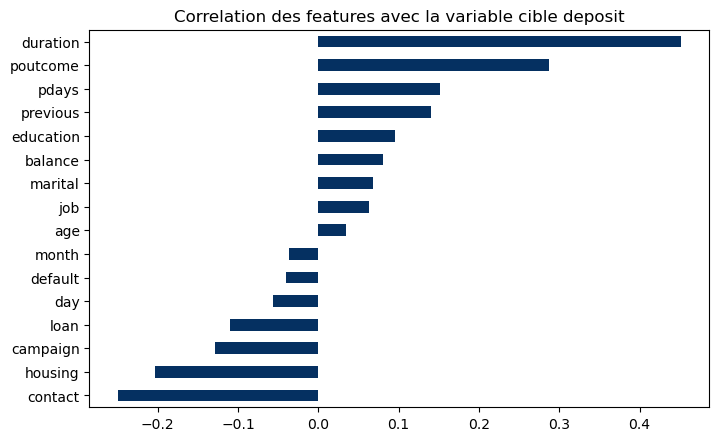

In [299]:
# Corrélation des features avec la target

plt.figure(figsize=(8,5),dpi=100)
plt.title(label="Correlation des features avec la variable cible deposit")
df.corr()['deposit'].sort_values().drop('deposit').plot(kind='barh', cmap='RdBu_r')